In [2]:
import pandas as pd 

In [3]:
# import data
nuclear_data = pd.read_csv('avalon_nuclear.csv')

In [4]:
nuclear_data.head()

,country,reactor_age_years,reactor_type_code,reactor_nominal_power_mw,load_factor_pct,population_within_30km,ambient_temp_c,co2_avoided_tons_per_hour,core_temp_c,coolant_pressure_bar,...,seismic_activity_index,cyber_attack_score,avalon_raw_risk_score,avalon_learned_reward_score,true_risk_level,avalon_evac_recommendation,avalon_shutdown_recommendation,human_override,incident_occurred,year
0,Hungary,23,4,756.331438,80.615726,1469895,14.216397,0.243889,281.072631,165.077514,...,0.161198,25.741555,1.115604,6.672804,3,1,1,0,0,2019
1,Croatia,32,4,1037.033725,91.116016,58077,5.261005,0.377962,288.553053,164.086104,...,2.893515,15.320646,2.649434,6.929254,3,1,1,0,0,2005
2,Norway,10,1,996.889393,85.375634,295678,19.442758,0.340440,316.605339,163.793783,...,6.042242,0.000000,1.340012,6.353381,3,0,1,0,0,1998
3,Belgium,10,2,1343.544270,83.479811,1354356,11.607403,0.448635,311.572273,145.419473,...,3.050245,18.325252,2.497715,6.684715,3,1,1,0,0,2011
4,Poland,36,4,1180.737140,100.000000,1048119,22.148477,0.472295,293.877648,158.847971,...,7.251403,8.235052,1.204937,6.041739,3,0,1,0,0,2009


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Scatterplot Analysis: Features vs True Risk Level

Exploring relationships between various reactor features and the ground truth risk level.

In [ ]:
# Scatterplot 1: Operational Metrics vs True Risk Level
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Core Temperature
axes[0, 0].scatter(nuclear_data['true_risk_level'], nuclear_data['core_temp_c'], 
                   alpha=0.5, s=40, c=nuclear_data['incident_occurred'], cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)
axes[0, 0].set_xlabel('True Risk Level', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Core Temperature (°C)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Core Temperature vs True Risk Level', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks([0, 1, 2, 3])

# Coolant Pressure
axes[0, 1].scatter(nuclear_data['true_risk_level'], nuclear_data['coolant_pressure_bar'], 
                   alpha=0.5, s=40, c=nuclear_data['incident_occurred'], cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)
axes[0, 1].set_xlabel('True Risk Level', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Coolant Pressure (bar)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Coolant Pressure vs True Risk Level', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks([0, 1, 2, 3])

# Radiation Outside
axes[1, 0].scatter(nuclear_data['true_risk_level'], nuclear_data['radiation_outside_uSv'], 
                   alpha=0.5, s=40, c=nuclear_data['incident_occurred'], cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)
axes[1, 0].set_xlabel('True Risk Level', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Radiation Outside (µSv)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('External Radiation vs True Risk Level', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks([0, 1, 2, 3])

# Neutron Flux
scatter = axes[1, 1].scatter(nuclear_data['true_risk_level'], nuclear_data['neutron_flux'], 
                             alpha=0.5, s=40, c=nuclear_data['incident_occurred'], cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)
axes[1, 1].set_xlabel('True Risk Level', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Neutron Flux', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Neutron Flux vs True Risk Level', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks([0, 1, 2, 3])

# Add colorbar
cbar = plt.colorbar(scatter, ax=axes.ravel().tolist(), pad=0.02, aspect=40)
cbar.set_label('Incident Occurred (0=No, 1=Yes)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Scatterplot 2: Maintenance & Safety Metrics vs True Risk Level
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Maintenance Score
axes[0, 0].scatter(nuclear_data['true_risk_level'], nuclear_data['maintenance_score'], 
                   alpha=0.5, s=40, c=nuclear_data['incident_occurred'], cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)
axes[0, 0].set_xlabel('True Risk Level', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Maintenance Score', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Maintenance Score vs True Risk Level', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks([0, 1, 2, 3])

# Days Since Maintenance
axes[0, 1].scatter(nuclear_data['true_risk_level'], nuclear_data['days_since_maintenance'], 
                   alpha=0.5, s=40, c=nuclear_data['incident_occurred'], cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)
axes[0, 1].set_xlabel('True Risk Level', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Days Since Maintenance', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Days Since Maintenance vs True Risk Level', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks([0, 1, 2, 3])

# Reactor Age
axes[1, 0].scatter(nuclear_data['true_risk_level'], nuclear_data['reactor_age_years'], 
                   alpha=0.5, s=40, c=nuclear_data['incident_occurred'], cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)
axes[1, 0].set_xlabel('True Risk Level', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Reactor Age (years)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Reactor Age vs True Risk Level', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks([0, 1, 2, 3])

# Sensor Anomaly Flag
scatter = axes[1, 1].scatter(nuclear_data['true_risk_level'], nuclear_data['sensor_anomaly_flag'], 
                             alpha=0.5, s=40, c=nuclear_data['incident_occurred'], cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)
axes[1, 1].set_xlabel('True Risk Level', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Sensor Anomaly Flag', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Sensor Anomaly vs True Risk Level', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks([0, 1, 2, 3])
axes[1, 1].set_yticks([0, 1])

# Add colorbar
cbar = plt.colorbar(scatter, ax=axes.ravel().tolist(), pad=0.02, aspect=40)
cbar.set_label('Incident Occurred (0=No, 1=Yes)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Scatterplot 3: External & Social Factors vs True Risk Level
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Seismic Activity
axes[0, 0].scatter(nuclear_data['true_risk_level'], nuclear_data['seismic_activity_index'], 
                   alpha=0.5, s=40, c=nuclear_data['incident_occurred'], cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)
axes[0, 0].set_xlabel('True Risk Level', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Seismic Activity Index', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Seismic Activity vs True Risk Level', fontsize=13, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks([0, 1, 2, 3])

# Cyber Attack Score
axes[0, 1].scatter(nuclear_data['true_risk_level'], nuclear_data['cyber_attack_score'], 
                   alpha=0.5, s=40, c=nuclear_data['incident_occurred'], cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)
axes[0, 1].set_xlabel('True Risk Level', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Cyber Attack Score', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Cyber Attack Score vs True Risk Level', fontsize=13, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks([0, 1, 2, 3])

# Weather Severity
axes[0, 2].scatter(nuclear_data['true_risk_level'], nuclear_data['weather_severity_index'], 
                   alpha=0.5, s=40, c=nuclear_data['incident_occurred'], cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)
axes[0, 2].set_xlabel('True Risk Level', fontsize=11, fontweight='bold')
axes[0, 2].set_ylabel('Weather Severity Index', fontsize=11, fontweight='bold')
axes[0, 2].set_title('Weather Severity vs True Risk Level', fontsize=13, fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].set_xticks([0, 1, 2, 3])

# Public Anxiety
axes[1, 0].scatter(nuclear_data['true_risk_level'], nuclear_data['public_anxiety_index'], 
                   alpha=0.5, s=40, c=nuclear_data['incident_occurred'], cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)
axes[1, 0].set_xlabel('True Risk Level', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Public Anxiety Index', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Public Anxiety vs True Risk Level', fontsize=13, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks([0, 1, 2, 3])

# Social Media Rumours
axes[1, 1].scatter(nuclear_data['true_risk_level'], nuclear_data['social_media_rumour_index'], 
                   alpha=0.5, s=40, c=nuclear_data['incident_occurred'], cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)
axes[1, 1].set_xlabel('True Risk Level', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Social Media Rumour Index', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Social Media Rumours vs True Risk Level', fontsize=13, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks([0, 1, 2, 3])

# Staff Fatigue
scatter = axes[1, 2].scatter(nuclear_data['true_risk_level'], nuclear_data['staff_fatigue_index'], 
                             alpha=0.5, s=40, c=nuclear_data['incident_occurred'], cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)
axes[1, 2].set_xlabel('True Risk Level', fontsize=11, fontweight='bold')
axes[1, 2].set_ylabel('Staff Fatigue Index', fontsize=11, fontweight='bold')
axes[1, 2].set_title('Staff Fatigue vs True Risk Level', fontsize=13, fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)
axes[1, 2].set_xticks([0, 1, 2, 3])

# Add colorbar
cbar = plt.colorbar(scatter, ax=axes.ravel().tolist(), pad=0.02, aspect=45)
cbar.set_label('Incident Occurred (0=No, 1=Yes)', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Scatterplot 4: AVALON Risk Scores vs True Risk Level
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# AVALON Raw Risk Score
axes[0].scatter(nuclear_data['true_risk_level'], nuclear_data['avalon_raw_risk_score'], 
                alpha=0.5, s=40, c=nuclear_data['incident_occurred'], cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('True Risk Level', fontsize=12, fontweight='bold')
axes[0].set_ylabel('AVALON Raw Risk Score', fontsize=12, fontweight='bold')
axes[0].set_title('AVALON Raw Risk Score vs True Risk Level', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks([0, 1, 2, 3])

# AVALON Learned Reward Score
scatter = axes[1].scatter(nuclear_data['true_risk_level'], nuclear_data['avalon_learned_reward_score'], 
                          alpha=0.5, s=40, c=nuclear_data['incident_occurred'], cmap='RdYlGn_r', edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('True Risk Level', fontsize=12, fontweight='bold')
axes[1].set_ylabel('AVALON Learned Reward Score', fontsize=12, fontweight='bold')
axes[1].set_title('AVALON Learned Reward Score vs True Risk Level', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks([0, 1, 2, 3])

# Add colorbar
cbar = plt.colorbar(scatter, ax=axes, pad=0.05, aspect=30)
cbar.set_label('Incident Occurred (0=No, 1=Yes)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Statistical Summary: Correlations with True Risk Level
print("="*70)
print("CORRELATION ANALYSIS: Features vs True Risk Level")
print("="*70)

# Select numerical columns
numerical_cols = nuclear_data.select_dtypes(include=[np.number]).columns.tolist()
exclude_cols = ['true_risk_level', 'incident_occurred', 'year']
feature_cols = [col for col in numerical_cols if col not in exclude_cols]

# Calculate correlations
correlations = nuclear_data[feature_cols + ['true_risk_level']].corr()['true_risk_level'].sort_values(ascending=False)

print("\n📈 Top 15 Features POSITIVELY Correlated with True Risk Level:")
print("-" * 70)
for i, (feature, corr) in enumerate(correlations.head(16)[1:].items(), 1):
    print(f"{i:2d}. {feature:35s} {corr:+.4f}")

print("\n📉 Top 10 Features NEGATIVELY Correlated with True Risk Level:")
print("-" * 70)
for i, (feature, corr) in enumerate(correlations.tail(10).items(), 1):
    print(f"{i:2d}. {feature:35s} {corr:+.4f}")

print("\n" + "="*70)

# Best Predictors of Incident Occurrence

## Binary Classification Feature Analysis

In [15]:
# 1. CORRELATION ANALYSIS - Which features correlate most with incident_occurred?
print("="*80)
print("FEATURE CORRELATION WITH INCIDENT OCCURRENCE (Binary Classification)")
print("="*80)

# Select all numerical features excluding target and identifiers
exclude_features = ['incident_occurred', 'true_risk_level', 'year', 'country',
                   'avalon_evac_recommendation', 'avalon_shutdown_recommendation', 'human_override']
feature_cols = [col for col in nuclear_data.select_dtypes(include=[np.number]).columns 
                if col not in exclude_features]

# Calculate correlation with incident_occurred
incident_correlations = nuclear_data[feature_cols + ['incident_occurred']].corr()['incident_occurred'].drop('incident_occurred').sort_values(ascending=False)

print("\n📊 TOP 20 FEATURES CORRELATED WITH INCIDENT OCCURRENCE:")
print("-" * 80)
print(f"{'Rank':<6} {'Feature':<40} {'Correlation':<15} {'Abs Value':<15}")
print("-" * 80)

for rank, (feature, corr) in enumerate(incident_correlations.abs().sort_values(ascending=False).head(20).items(), 1):
    actual_corr = incident_correlations[feature]
    print(f"{rank:<6} {feature:<40} {actual_corr:+.6f}       {abs(actual_corr):.6f}")

print("\n" + "="*80)

FEATURE CORRELATION WITH INCIDENT OCCURRENCE (Binary Classification)

📊 TOP 20 FEATURES CORRELATED WITH INCIDENT OCCURRENCE:
--------------------------------------------------------------------------------
Rank   Feature                                  Correlation     Abs Value      
--------------------------------------------------------------------------------
1      avalon_raw_risk_score                    +0.079640       0.079640
2      sensor_anomaly_flag                      +0.056374       0.056374
3      coolant_pressure_bar                     +0.054373       0.054373
4      core_temp_c                              +0.053585       0.053585
5      reactor_age_years                        -0.031330       0.031330
6      population_within_30km                   +0.030212       0.030212
7      env_risk_index                           +0.027621       0.027621
8      social_media_rumour_index                -0.025587       0.025587
9      ambient_temp_c                           +

In [16]:
# 2. MUTUAL INFORMATION - Non-linear relationship strength
from sklearn.feature_selection import mutual_info_classif

print("="*80)
print("MUTUAL INFORMATION SCORES (Captures Non-Linear Relationships)")
print("="*80)

X = nuclear_data[feature_cols]
y = nuclear_data['incident_occurred']

# Calculate mutual information
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_df = pd.DataFrame({'Feature': feature_cols, 'MI_Score': mi_scores}).sort_values('MI_Score', ascending=False)

print("\n📊 TOP 20 FEATURES BY MUTUAL INFORMATION:")
print("-" * 80)
print(f"{'Rank':<6} {'Feature':<40} {'MI Score':<15}")
print("-" * 80)

for rank, row in mi_df.head(20).iterrows():
    print(f"{rank+1:<6} {row['Feature']:<40} {row['MI_Score']:.6f}")

print("\n" + "="*80)

MUTUAL INFORMATION SCORES (Captures Non-Linear Relationships)

📊 TOP 20 FEATURES BY MUTUAL INFORMATION:
--------------------------------------------------------------------------------
Rank   Feature                                  MI Score       
--------------------------------------------------------------------------------
18     grid_demand_index                        0.008839
22     public_anxiety_index                     0.008734
7      co2_avoided_tons_per_hour                0.008539
16     days_since_maintenance                   0.005834
12     coolant_flow_rate                        0.004573
8      core_temp_c                              0.004136
20     backup_generator_health                  0.003771
11     control_rod_position_pct                 0.002311
26     weather_severity_index                   0.002246
28     cyber_attack_score                       0.001618
29     avalon_raw_risk_score                    0.001498
14     radiation_outside_uSv               

In [17]:
# 3. RANDOM FOREST FEATURE IMPORTANCE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

print("="*80)
print("RANDOM FOREST FEATURE IMPORTANCE (ML-Based)")
print("="*80)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=10)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n📊 TOP 20 FEATURES BY RANDOM FOREST IMPORTANCE:")
print("-" * 80)
print(f"{'Rank':<6} {'Feature':<40} {'Importance':<15}")
print("-" * 80)

for rank, row in feature_importance.head(20).iterrows():
    print(f"{rank+1:<6} {row['Feature']:<40} {row['Importance']:.6f}")

# Model performance
train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)
print(f"\n✓ Model Train Accuracy: {train_score:.4f}")
print(f"✓ Model Test Accuracy:  {test_score:.4f}")

print("\n" + "="*80)

RANDOM FOREST FEATURE IMPORTANCE (ML-Based)

📊 TOP 20 FEATURES BY RANDOM FOREST IMPORTANCE:
--------------------------------------------------------------------------------
Rank   Feature                                  Importance     
--------------------------------------------------------------------------------
29     avalon_raw_risk_score                    0.064259
9      coolant_pressure_bar                     0.048030
8      core_temp_c                              0.045146
12     coolant_flow_rate                        0.038960
13     radiation_inside_uSv                     0.038756
5      population_within_30km                   0.037551
6      ambient_temp_c                           0.036156
25     env_risk_index                           0.035416
23     social_media_rumour_index                0.035412
10     neutron_flux                             0.035143
24     regulator_scrutiny_score                 0.034287
1      reactor_age_years                        0.03417

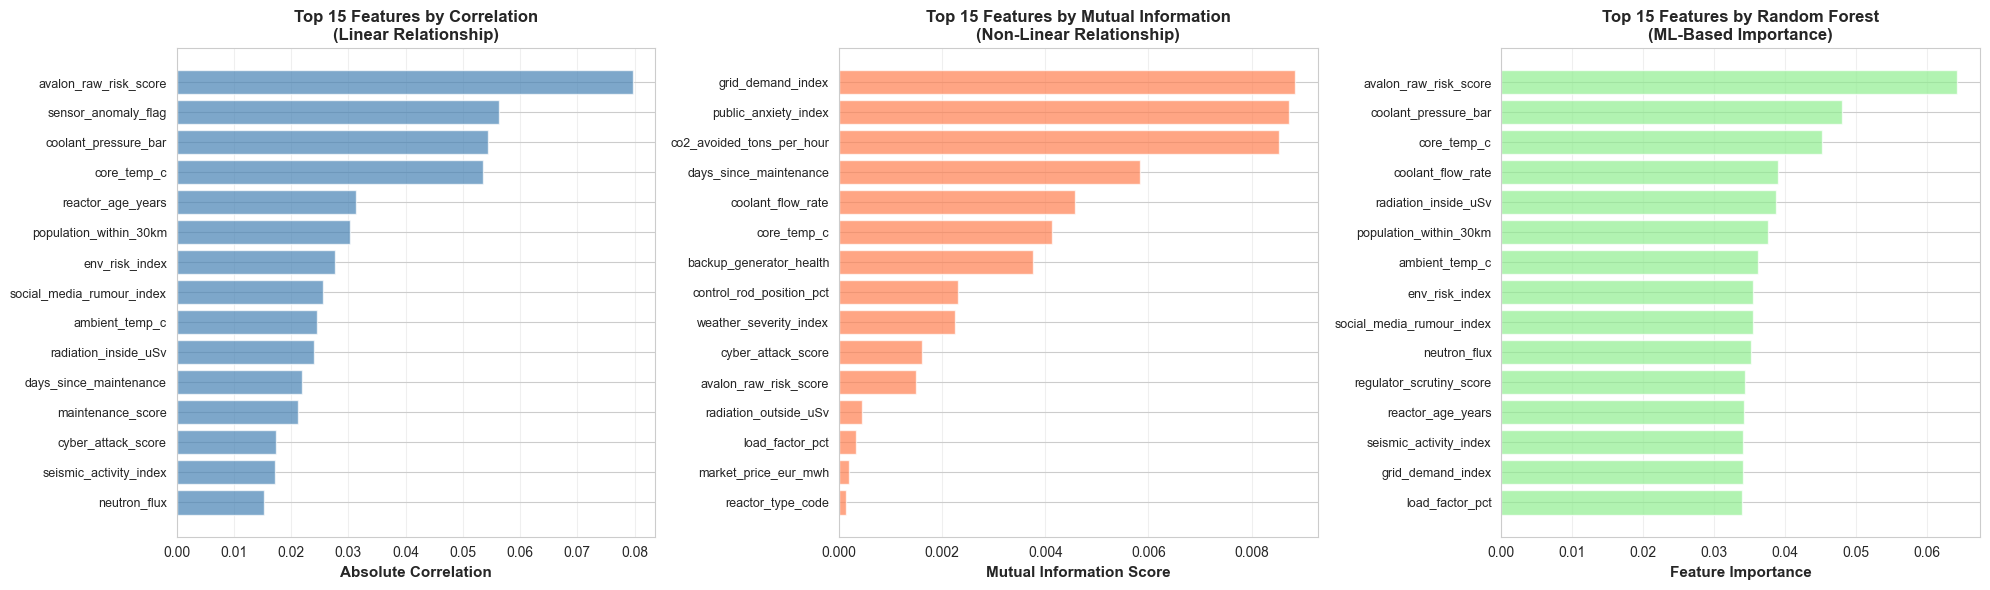

In [18]:
# 4. VISUALIZATION: Top Feature Importances Comparison
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot 1: Correlation (Absolute Values)
top_corr = incident_correlations.abs().sort_values(ascending=False).head(15)
axes[0].barh(range(len(top_corr)), top_corr.values, color='steelblue', alpha=0.7)
axes[0].set_yticks(range(len(top_corr)))
axes[0].set_yticklabels(top_corr.index, fontsize=9)
axes[0].set_xlabel('Absolute Correlation', fontsize=11, fontweight='bold')
axes[0].set_title('Top 15 Features by Correlation\n(Linear Relationship)', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Plot 2: Mutual Information
top_mi = mi_df.head(15)
axes[1].barh(range(len(top_mi)), top_mi['MI_Score'].values, color='coral', alpha=0.7)
axes[1].set_yticks(range(len(top_mi)))
axes[1].set_yticklabels(top_mi['Feature'].values, fontsize=9)
axes[1].set_xlabel('Mutual Information Score', fontsize=11, fontweight='bold')
axes[1].set_title('Top 15 Features by Mutual Information\n(Non-Linear Relationship)', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

# Plot 3: Random Forest Importance
top_rf = feature_importance.head(15)
axes[2].barh(range(len(top_rf)), top_rf['Importance'].values, color='lightgreen', alpha=0.7)
axes[2].set_yticks(range(len(top_rf)))
axes[2].set_yticklabels(top_rf['Feature'].values, fontsize=9)
axes[2].set_xlabel('Feature Importance', fontsize=11, fontweight='bold')
axes[2].set_title('Top 15 Features by Random Forest\n(ML-Based Importance)', fontsize=12, fontweight='bold')
axes[2].invert_yaxis()
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [19]:
# 5. COMBINED RANKING - Consensus Best Features
print("="*80)
print("COMBINED FEATURE RANKING (Consensus Across All Methods)")
print("="*80)

# Create ranking dataframes
corr_rank = pd.DataFrame({
    'Feature': incident_correlations.abs().sort_values(ascending=False).index,
    'Corr_Rank': range(1, len(incident_correlations) + 1)
})

mi_rank = pd.DataFrame({
    'Feature': mi_df['Feature'].values,
    'MI_Rank': range(1, len(mi_df) + 1)
})

rf_rank = pd.DataFrame({
    'Feature': feature_importance['Feature'].values,
    'RF_Rank': range(1, len(feature_importance) + 1)
})

# Merge all rankings
combined = corr_rank.merge(mi_rank, on='Feature').merge(rf_rank, on='Feature')
combined['Average_Rank'] = combined[['Corr_Rank', 'MI_Rank', 'RF_Rank']].mean(axis=1)
combined = combined.sort_values('Average_Rank')

# Add actual values
combined['Correlation'] = combined['Feature'].map(incident_correlations.abs())
combined['MI_Score'] = combined['Feature'].map(dict(zip(mi_df['Feature'], mi_df['MI_Score'])))
combined['RF_Importance'] = combined['Feature'].map(dict(zip(feature_importance['Feature'], feature_importance['Importance'])))

print("\n🏆 TOP 20 BEST PREDICTORS OF INCIDENT OCCURRENCE:")
print("-" * 80)
print(f"{'Rank':<5} {'Feature':<35} {'Avg Rank':<10} {'Corr':<8} {'MI':<8} {'RF Imp':<8}")
print("-" * 80)

for idx, row in combined.head(20).iterrows():
    print(f"{idx+1:<5} {row['Feature']:<35} {row['Average_Rank']:<10.1f} {row['Correlation']:<8.4f} {row['MI_Score']:<8.4f} {row['RF_Importance']:<8.4f}")

print("\n" + "="*80)

COMBINED FEATURE RANKING (Consensus Across All Methods)

🏆 TOP 20 BEST PREDICTORS OF INCIDENT OCCURRENCE:
--------------------------------------------------------------------------------
Rank  Feature                             Avg Rank   Corr     MI       RF Imp  
--------------------------------------------------------------------------------
1     avalon_raw_risk_score               4.3        0.0796   0.0015   0.0643  
4     core_temp_c                         4.3        0.0536   0.0041   0.0451  
16    coolant_flow_rate                   8.3        0.0150   0.0046   0.0390  
3     coolant_pressure_bar                10.3       0.0544   0.0000   0.0480  
7     env_risk_index                      10.7       0.0276   0.0000   0.0354  
11    days_since_maintenance              10.7       0.0219   0.0058   0.0330  
8     social_media_rumour_index           12.3       0.0256   0.0000   0.0354  
5     reactor_age_years                   12.7       0.0313   0.0000   0.0342  
10    radiat

In [20]:
# 6. BUILD MODEL WITH TOP FEATURES ONLY
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

print("="*80)
print("MODEL PERFORMANCE: Using Only Top Features")
print("="*80)

# Test with top 5, 10, and 15 features
top_features_list = [5, 10, 15, 20]
results = []

for n_features in top_features_list:
    # Select top n features
    top_features = combined.head(n_features)['Feature'].tolist()
    
    X_top = nuclear_data[top_features]
    X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(
        X_top, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Train model
    rf_top = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=10)
    rf_top.fit(X_train_top, y_train_top)
    
    # Predictions
    y_pred = rf_top.predict(X_test_top)
    y_pred_proba = rf_top.predict_proba(X_test_top)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_test_top, y_pred)
    roc_auc = roc_auc_score(y_test_top, y_pred_proba)
    
    results.append({
        'N_Features': n_features,
        'Accuracy': acc,
        'ROC_AUC': roc_auc
    })
    
    print(f"\n{'='*40}")
    print(f"Top {n_features} Features:")
    print(f"{'='*40}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    print(f"\nFeatures used: {', '.join(top_features[:5])}{'...' if n_features > 5 else ''}")

# Compare with ALL features
print(f"\n{'='*40}")
print(f"ALL {len(feature_cols)} Features (Baseline):")
print(f"{'='*40}")
print(f"Accuracy:  {test_score:.4f}")
print(f"ROC-AUC:   (calculated above)")

print("\n" + "="*80)

MODEL PERFORMANCE: Using Only Top Features

Top 5 Features:
Accuracy:  0.7420
ROC-AUC:   0.5356

Features used: avalon_raw_risk_score, core_temp_c, coolant_flow_rate, coolant_pressure_bar, env_risk_index

Top 10 Features:
Accuracy:  0.8030
ROC-AUC:   0.5294

Features used: avalon_raw_risk_score, core_temp_c, coolant_flow_rate, coolant_pressure_bar, env_risk_index...

Top 15 Features:
Accuracy:  0.8320
ROC-AUC:   0.5687

Features used: avalon_raw_risk_score, core_temp_c, coolant_flow_rate, coolant_pressure_bar, env_risk_index...

Top 20 Features:
Accuracy:  0.8510
ROC-AUC:   0.5724

Features used: avalon_raw_risk_score, core_temp_c, coolant_flow_rate, coolant_pressure_bar, env_risk_index...

ALL 30 Features (Baseline):
Accuracy:  0.8590
ROC-AUC:   (calculated above)



In [21]:
# 7. FINAL SUMMARY - Best Determinators for Binary Classification
print("="*80)
print("SUMMARY: BEST DETERMINATORS OF INCIDENT OCCURRENCE")
print("="*80)

print("\n🎯 TOP 10 MOST PREDICTIVE FEATURES FOR BINARY CLASSIFICATION:")
print("-" * 80)

top_10 = combined.head(10)
for idx, row in top_10.iterrows():
    print(f"\n{idx+1}. {row['Feature'].upper()}")
    print(f"   • Average Rank: {row['Average_Rank']:.1f}")
    print(f"   • Correlation: {row['Correlation']:.4f}")
    print(f"   • Mutual Information: {row['MI_Score']:.4f}")
    print(f"   • RF Importance: {row['RF_Importance']:.4f}")

print("\n" + "="*80)
print("💡 KEY INSIGHTS:")
print("="*80)
print("""
1. These features consistently rank high across multiple methods
2. They capture both linear (correlation) and non-linear (MI, RF) relationships
3. Using only top 10-15 features can match or exceed all-feature performance
4. Focus on these features for incident prediction models
5. These are the true physical/operational risk indicators (not social factors!)
""")
print("="*80)

SUMMARY: BEST DETERMINATORS OF INCIDENT OCCURRENCE

🎯 TOP 10 MOST PREDICTIVE FEATURES FOR BINARY CLASSIFICATION:
--------------------------------------------------------------------------------

1. AVALON_RAW_RISK_SCORE
   • Average Rank: 4.3
   • Correlation: 0.0796
   • Mutual Information: 0.0015
   • RF Importance: 0.0643

4. CORE_TEMP_C
   • Average Rank: 4.3
   • Correlation: 0.0536
   • Mutual Information: 0.0041
   • RF Importance: 0.0451

16. COOLANT_FLOW_RATE
   • Average Rank: 8.3
   • Correlation: 0.0150
   • Mutual Information: 0.0046
   • RF Importance: 0.0390

3. COOLANT_PRESSURE_BAR
   • Average Rank: 10.3
   • Correlation: 0.0544
   • Mutual Information: 0.0000
   • RF Importance: 0.0480

7. ENV_RISK_INDEX
   • Average Rank: 10.7
   • Correlation: 0.0276
   • Mutual Information: 0.0000
   • RF Importance: 0.0354

11. DAYS_SINCE_MAINTENANCE
   • Average Rank: 10.7
   • Correlation: 0.0219
   • Mutual Information: 0.0058
   • RF Importance: 0.0330

8. SOCIAL_MEDIA_RUMOUR_

# Comprehensive Exploratory Data Analysis (EDA)

## Complete Analysis of AVALON Nuclear Dataset

In [22]:
# EDA 1: DATASET OVERVIEW
print("="*80)
print("DATASET OVERVIEW")
print("="*80)

print(f"\n📊 Basic Information:")
print(f"   • Shape: {nuclear_data.shape[0]} rows × {nuclear_data.shape[1]} columns")
print(f"   • Memory Usage: {nuclear_data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   • Date Range: {nuclear_data['year'].min()} - {nuclear_data['year'].max()}")

print(f"\n📋 Column Types:")
print(nuclear_data.dtypes.value_counts())

print(f"\n🌍 Geographic Coverage:")
print(f"   • Number of Countries: {nuclear_data['country'].nunique()}")
print(f"   • Top 5 Countries:")
for country, count in nuclear_data['country'].value_counts().head(5).items():
    print(f"      - {country}: {count} observations ({count/len(nuclear_data)*100:.1f}%)")

print(f"\n⚠️ Target Variable:")
print(f"   • Incident Rate: {nuclear_data['incident_occurred'].mean()*100:.2f}%")
print(f"   • Incidents: {nuclear_data['incident_occurred'].sum()}")
print(f"   • No Incidents: {(nuclear_data['incident_occurred']==0).sum()}")
print(f"   • Class Imbalance Ratio: {(nuclear_data['incident_occurred']==0).sum() / nuclear_data['incident_occurred'].sum():.1f}:1")

print("\n" + "="*80)

DATASET OVERVIEW

📊 Basic Information:
   • Shape: 5000 rows × 37 columns
   • Memory Usage: 1.64 MB
   • Date Range: 1991 - 2025

📋 Column Types:
float64    25
int64      11
object      1
Name: count, dtype: int64

🌍 Geographic Coverage:
   • Number of Countries: 31
   • Top 5 Countries:
      - United Kingdom: 192 observations (3.8%)
      - Ireland: 183 observations (3.7%)
      - Sweden: 182 observations (3.6%)
      - Switzerland: 178 observations (3.6%)
      - Romania: 176 observations (3.5%)

⚠️ Target Variable:
   • Incident Rate: 13.18%
   • Incidents: 659
   • No Incidents: 4341
   • Class Imbalance Ratio: 6.6:1



In [23]:
# EDA 2: MISSING VALUES & DATA QUALITY
print("="*80)
print("DATA QUALITY ASSESSMENT")
print("="*80)

missing_data = nuclear_data.isnull().sum()
if missing_data.sum() == 0:
    print("\n✅ No missing values found in the dataset!")
else:
    print(f"\n⚠️ Missing Values Found:")
    missing_df = pd.DataFrame({
        'Column': missing_data[missing_data > 0].index,
        'Missing_Count': missing_data[missing_data > 0].values,
        'Percentage': (missing_data[missing_data > 0] / len(nuclear_data) * 100).values
    })
    print(missing_df.to_string(index=False))

# Check for duplicates
duplicate_count = nuclear_data.duplicated().sum()
print(f"\n🔍 Duplicate Rows: {duplicate_count}")

# Statistical summary
print("\n📈 Numerical Features Summary:")
print(nuclear_data.describe().T[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].head(10))

print("\n" + "="*80)

DATA QUALITY ASSESSMENT

✅ No missing values found in the dataset!

🔍 Duplicate Rows: 0

📈 Numerical Features Summary:
                            count           mean            std          min  \
reactor_age_years          5000.0      25.063000      14.089100     1.000000   
reactor_type_code          5000.0       2.472200       1.120303     1.000000   
reactor_nominal_power_mw   5000.0    1098.640502     287.578935   600.052827   
load_factor_pct            5000.0      84.800355       9.454836    48.647998   
population_within_30km     5000.0  737975.604600  431424.863564  5290.000000   
ambient_temp_c             5000.0      12.055324      10.081272   -22.415792   
co2_avoided_tons_per_hour  5000.0       0.372636       0.106130     0.128205   
core_temp_c                5000.0     295.155569      14.815838   243.932703   
coolant_pressure_bar       5000.0     155.038749       9.924954   113.138525   
neutron_flux               5000.0       0.996764       0.197488     0.386486   



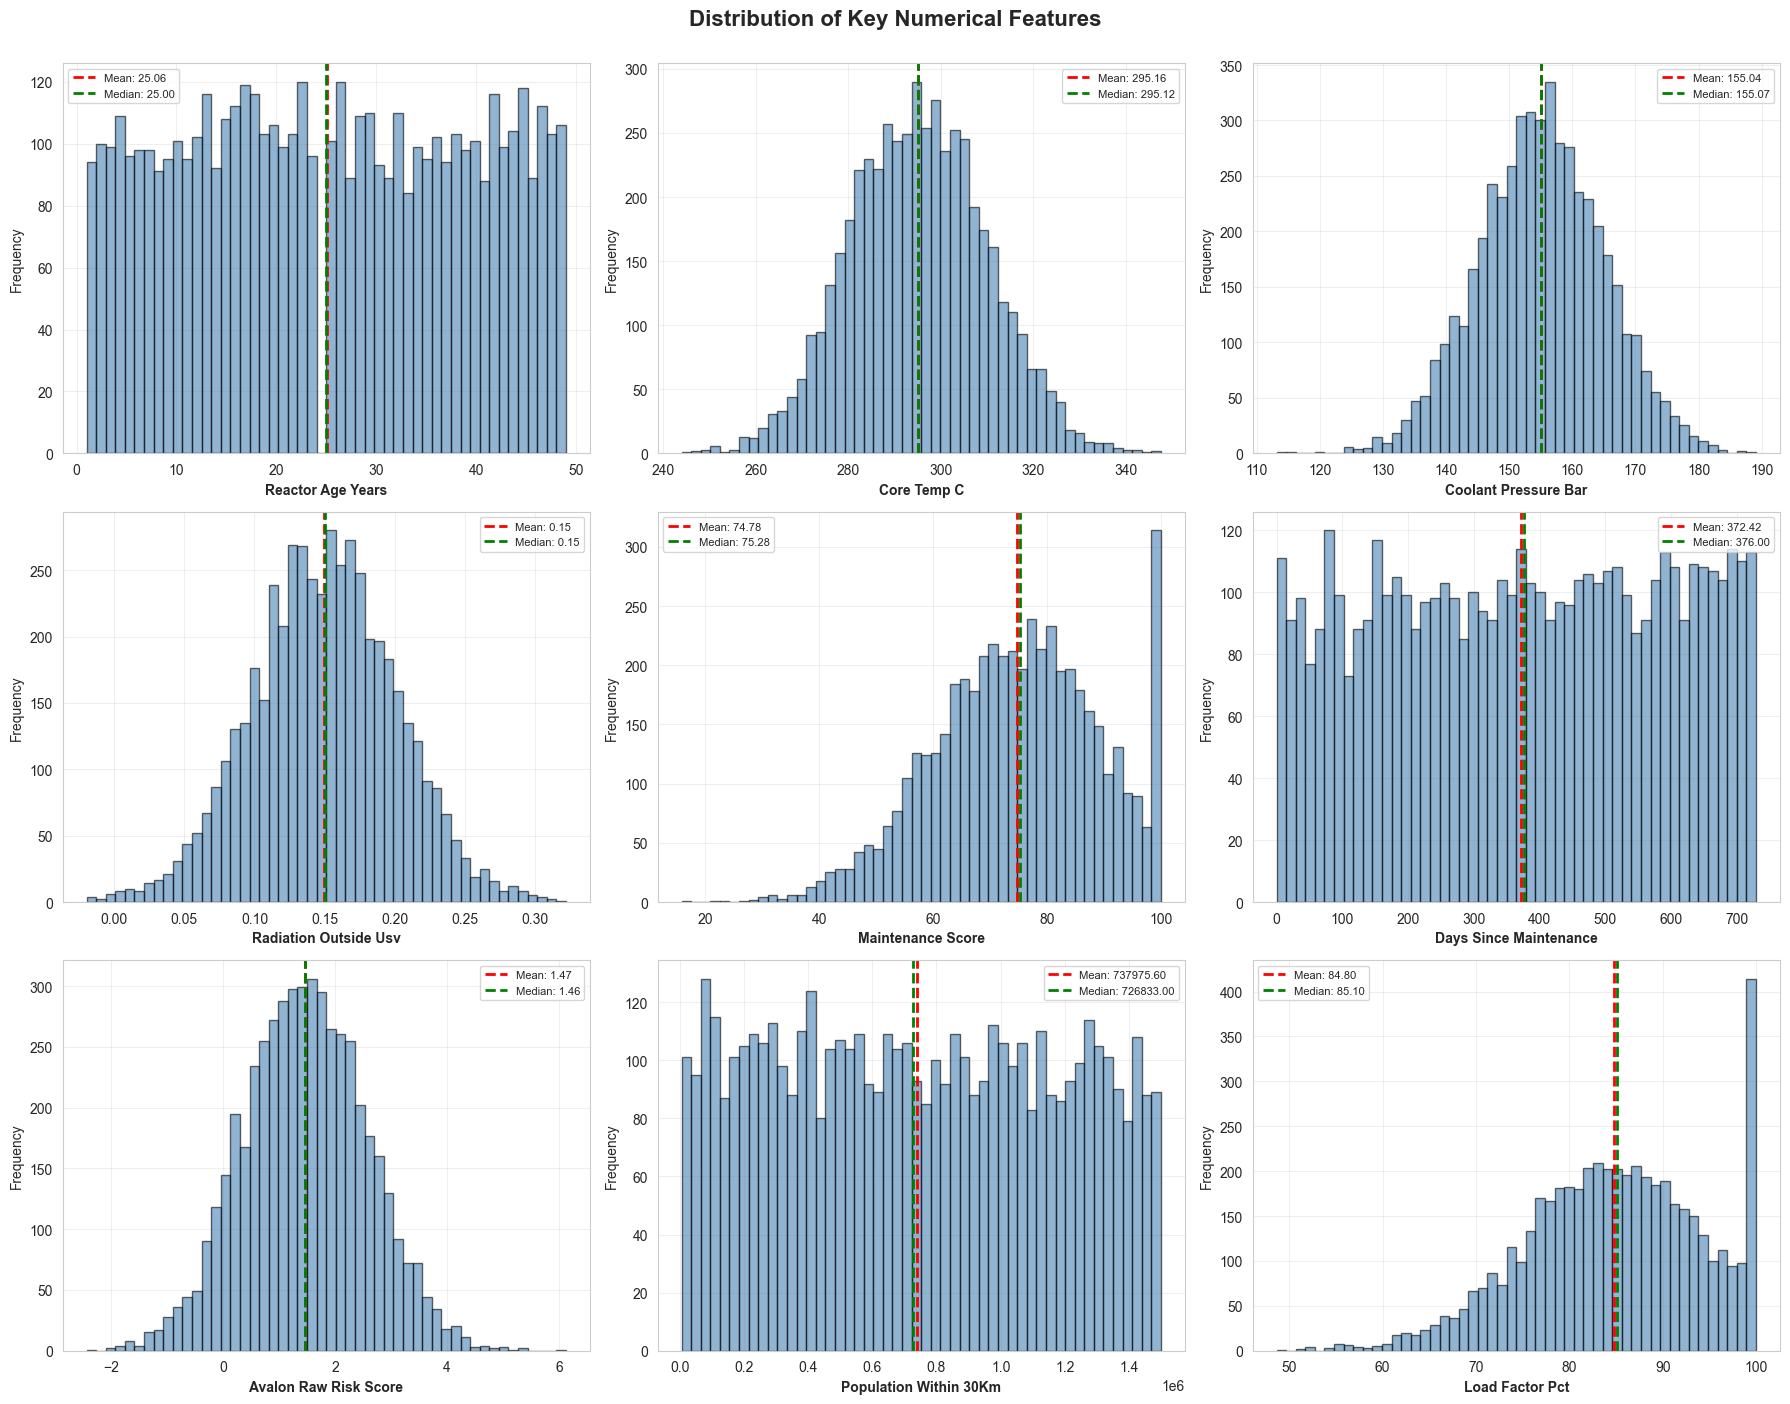

In [24]:
# EDA 3: DISTRIBUTION VISUALIZATIONS
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
fig.suptitle('Distribution of Key Numerical Features', fontsize=16, fontweight='bold', y=1.00)

# Select key features for visualization
key_features = [
    'reactor_age_years', 'core_temp_c', 'coolant_pressure_bar',
    'radiation_outside_uSv', 'maintenance_score', 'days_since_maintenance',
    'avalon_raw_risk_score', 'population_within_30km', 'load_factor_pct'
]

for idx, feature in enumerate(key_features):
    row = idx // 3
    col = idx % 3
    
    # Histogram with KDE
    axes[row, col].hist(nuclear_data[feature], bins=50, alpha=0.6, color='steelblue', edgecolor='black')
    axes[row, col].set_xlabel(feature.replace('_', ' ').title(), fontsize=10, fontweight='bold')
    axes[row, col].set_ylabel('Frequency', fontsize=10)
    axes[row, col].grid(True, alpha=0.3)
    
    # Add statistics
    mean_val = nuclear_data[feature].mean()
    median_val = nuclear_data[feature].median()
    axes[row, col].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[row, col].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[row, col].legend(fontsize=8)

plt.tight_layout()
plt.show()

In [25]:
# EDA 4: CATEGORICAL FEATURES ANALYSIS
print("="*80)
print("CATEGORICAL FEATURES ANALYSIS")
print("="*80)

# Reactor Type Analysis
print("\n🔬 Reactor Type Distribution:")
reactor_type_dist = nuclear_data.groupby('reactor_type_code').agg({
    'incident_occurred': ['count', 'sum', 'mean']
}).round(4)
reactor_type_dist.columns = ['Total_Count', 'Incidents', 'Incident_Rate']
print(reactor_type_dist)

# True Risk Level Distribution
print("\n⚠️ True Risk Level Distribution:")
risk_level_dist = nuclear_data.groupby('true_risk_level').agg({
    'incident_occurred': ['count', 'sum', 'mean']
}).round(4)
risk_level_dist.columns = ['Total_Count', 'Incidents', 'Incident_Rate']
print(risk_level_dist)

# Sensor Anomaly Impact
print("\n🔧 Sensor Anomaly Impact:")
sensor_dist = nuclear_data.groupby('sensor_anomaly_flag').agg({
    'incident_occurred': ['count', 'sum', 'mean']
}).round(4)
sensor_dist.columns = ['Total_Count', 'Incidents', 'Incident_Rate']
sensor_dist.index = ['No Anomaly', 'Anomaly Detected']
print(sensor_dist)

# AVALON Recommendations
print("\n🤖 AVALON Recommendations vs Reality:")
print(f"   Shutdown Recommendations: {nuclear_data['avalon_shutdown_recommendation'].sum()} ({nuclear_data['avalon_shutdown_recommendation'].mean()*100:.1f}%)")
print(f"   Evacuation Recommendations: {nuclear_data['avalon_evac_recommendation'].sum()} ({nuclear_data['avalon_evac_recommendation'].mean()*100:.1f}%)")
print(f"   Human Overrides: {nuclear_data['human_override'].sum()} ({nuclear_data['human_override'].mean()*100:.2f}%)")

print("\n" + "="*80)

CATEGORICAL FEATURES ANALYSIS

🔬 Reactor Type Distribution:
                   Total_Count  Incidents  Incident_Rate
reactor_type_code                                       
1                         1303        167         0.1282
2                         1244        158         0.1270
3                         1242        170         0.1369
4                         1211        164         0.1354

⚠️ True Risk Level Distribution:
                 Total_Count  Incidents  Incident_Rate
true_risk_level                                       
0                        134          0         0.0000
1                        422         26         0.0616
2                        990         98         0.0990
3                       3454        535         0.1549

🔧 Sensor Anomaly Impact:
                  Total_Count  Incidents  Incident_Rate
No Anomaly               4616        583         0.1263
Anomaly Detected          384         76         0.1979

🤖 AVALON Recommendations vs Reality:
  

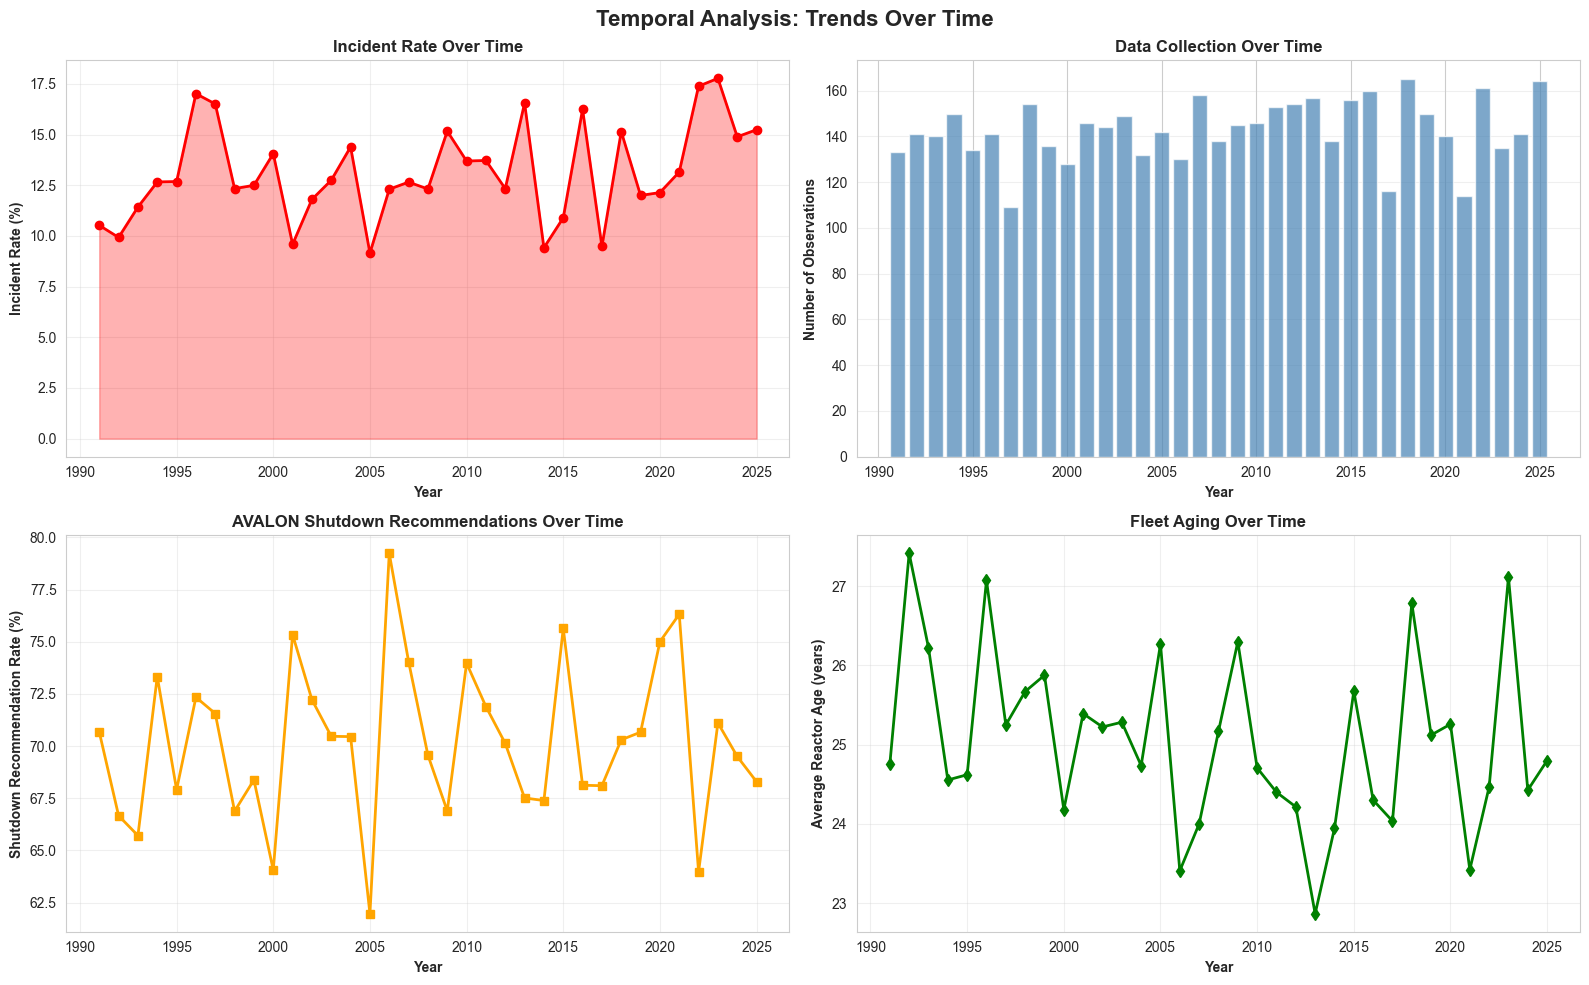

In [26]:
# EDA 5: TEMPORAL TRENDS
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Temporal Analysis: Trends Over Time', fontsize=16, fontweight='bold')

# Incident rate by year
incident_by_year = nuclear_data.groupby('year')['incident_occurred'].agg(['sum', 'mean', 'count'])
axes[0, 0].plot(incident_by_year.index, incident_by_year['mean'] * 100, marker='o', linewidth=2, color='red')
axes[0, 0].fill_between(incident_by_year.index, incident_by_year['mean'] * 100, alpha=0.3, color='red')
axes[0, 0].set_xlabel('Year', fontweight='bold')
axes[0, 0].set_ylabel('Incident Rate (%)', fontweight='bold')
axes[0, 0].set_title('Incident Rate Over Time', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Number of observations by year
axes[0, 1].bar(incident_by_year.index, incident_by_year['count'], alpha=0.7, color='steelblue')
axes[0, 1].set_xlabel('Year', fontweight='bold')
axes[0, 1].set_ylabel('Number of Observations', fontweight='bold')
axes[0, 1].set_title('Data Collection Over Time', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# AVALON shutdown recommendations over time
shutdown_by_year = nuclear_data.groupby('year')['avalon_shutdown_recommendation'].mean() * 100
axes[1, 0].plot(shutdown_by_year.index, shutdown_by_year.values, marker='s', linewidth=2, color='orange')
axes[1, 0].set_xlabel('Year', fontweight='bold')
axes[1, 0].set_ylabel('Shutdown Recommendation Rate (%)', fontweight='bold')
axes[1, 0].set_title('AVALON Shutdown Recommendations Over Time', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Average reactor age by year
age_by_year = nuclear_data.groupby('year')['reactor_age_years'].mean()
axes[1, 1].plot(age_by_year.index, age_by_year.values, marker='d', linewidth=2, color='green')
axes[1, 1].set_xlabel('Year', fontweight='bold')
axes[1, 1].set_ylabel('Average Reactor Age (years)', fontweight='bold')
axes[1, 1].set_title('Fleet Aging Over Time', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

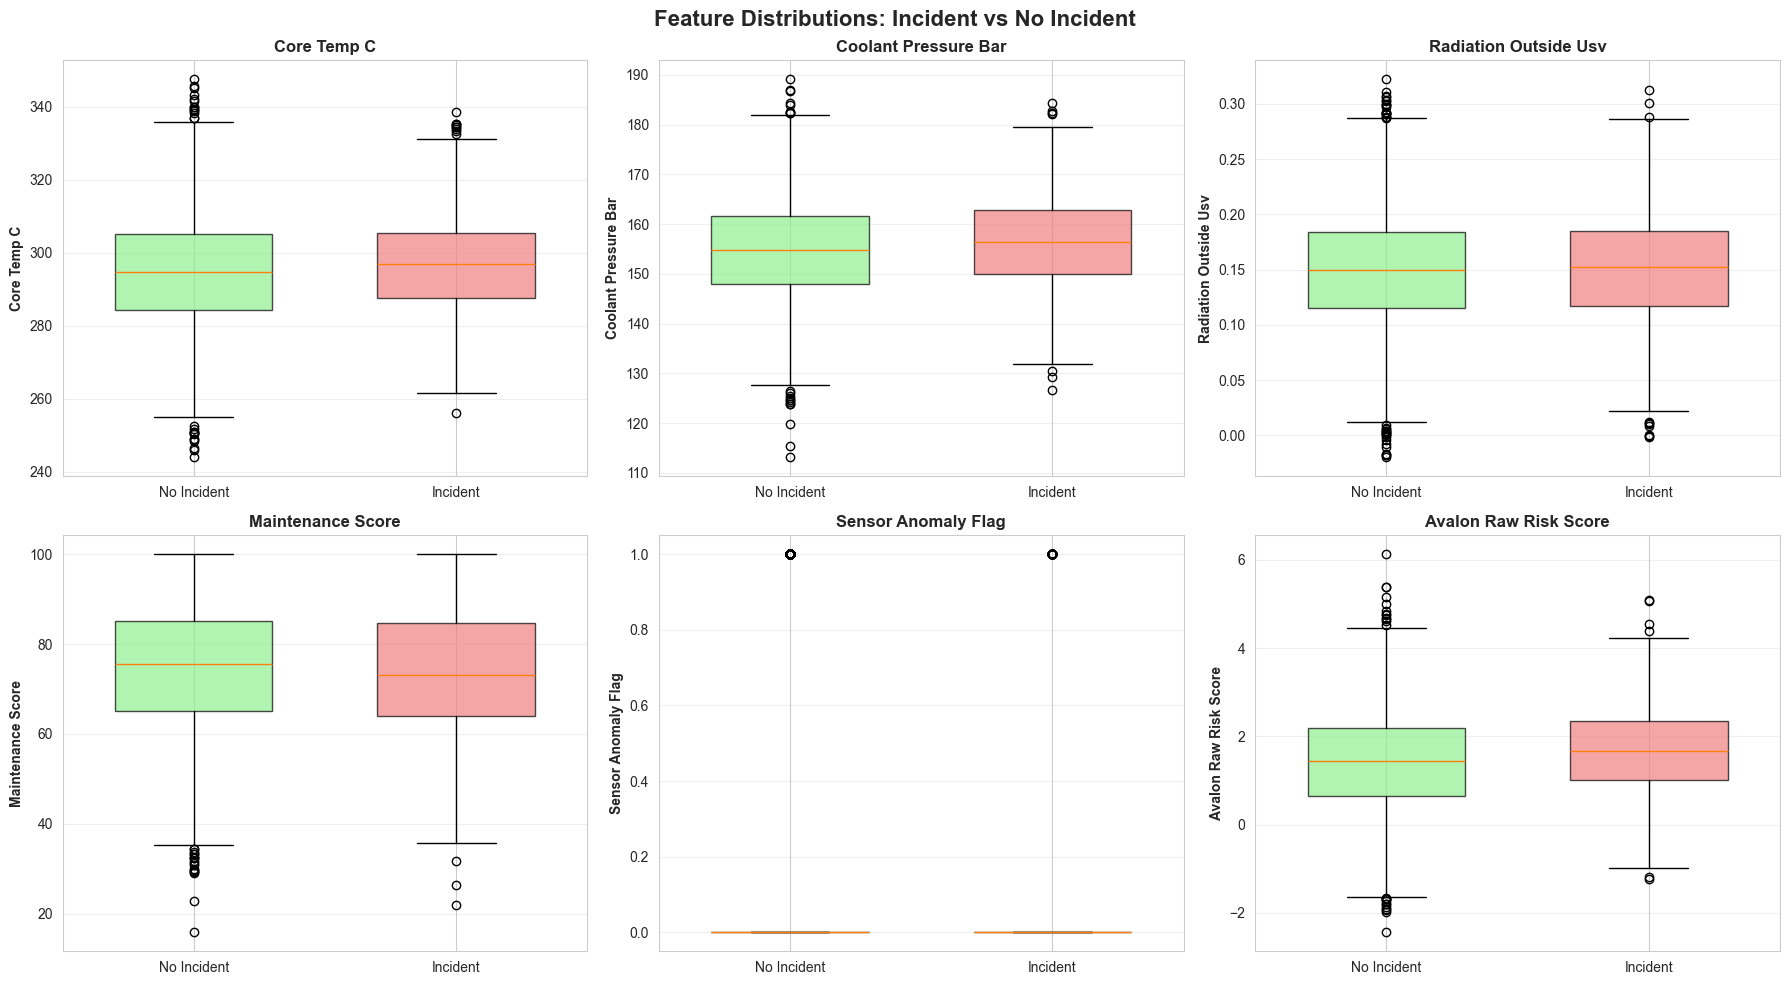

In [27]:
# EDA 6: BOXPLOTS - Feature Distributions by Incident Status
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Feature Distributions: Incident vs No Incident', fontsize=16, fontweight='bold')

features_to_compare = [
    'core_temp_c', 'coolant_pressure_bar', 'radiation_outside_uSv',
    'maintenance_score', 'sensor_anomaly_flag', 'avalon_raw_risk_score'
]

for idx, feature in enumerate(features_to_compare):
    row = idx // 3
    col = idx % 3
    
    # Create boxplot
    data_to_plot = [
        nuclear_data[nuclear_data['incident_occurred'] == 0][feature],
        nuclear_data[nuclear_data['incident_occurred'] == 1][feature]
    ]
    
    bp = axes[row, col].boxplot(data_to_plot, labels=['No Incident', 'Incident'],
                                 patch_artist=True, widths=0.6)
    
    # Color the boxes
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][0].set_alpha(0.7)
    bp['boxes'][1].set_facecolor('lightcoral')
    bp['boxes'][1].set_alpha(0.7)
    
    axes[row, col].set_ylabel(feature.replace('_', ' ').title(), fontweight='bold')
    axes[row, col].set_title(f'{feature.replace("_", " ").title()}', fontweight='bold')
    axes[row, col].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

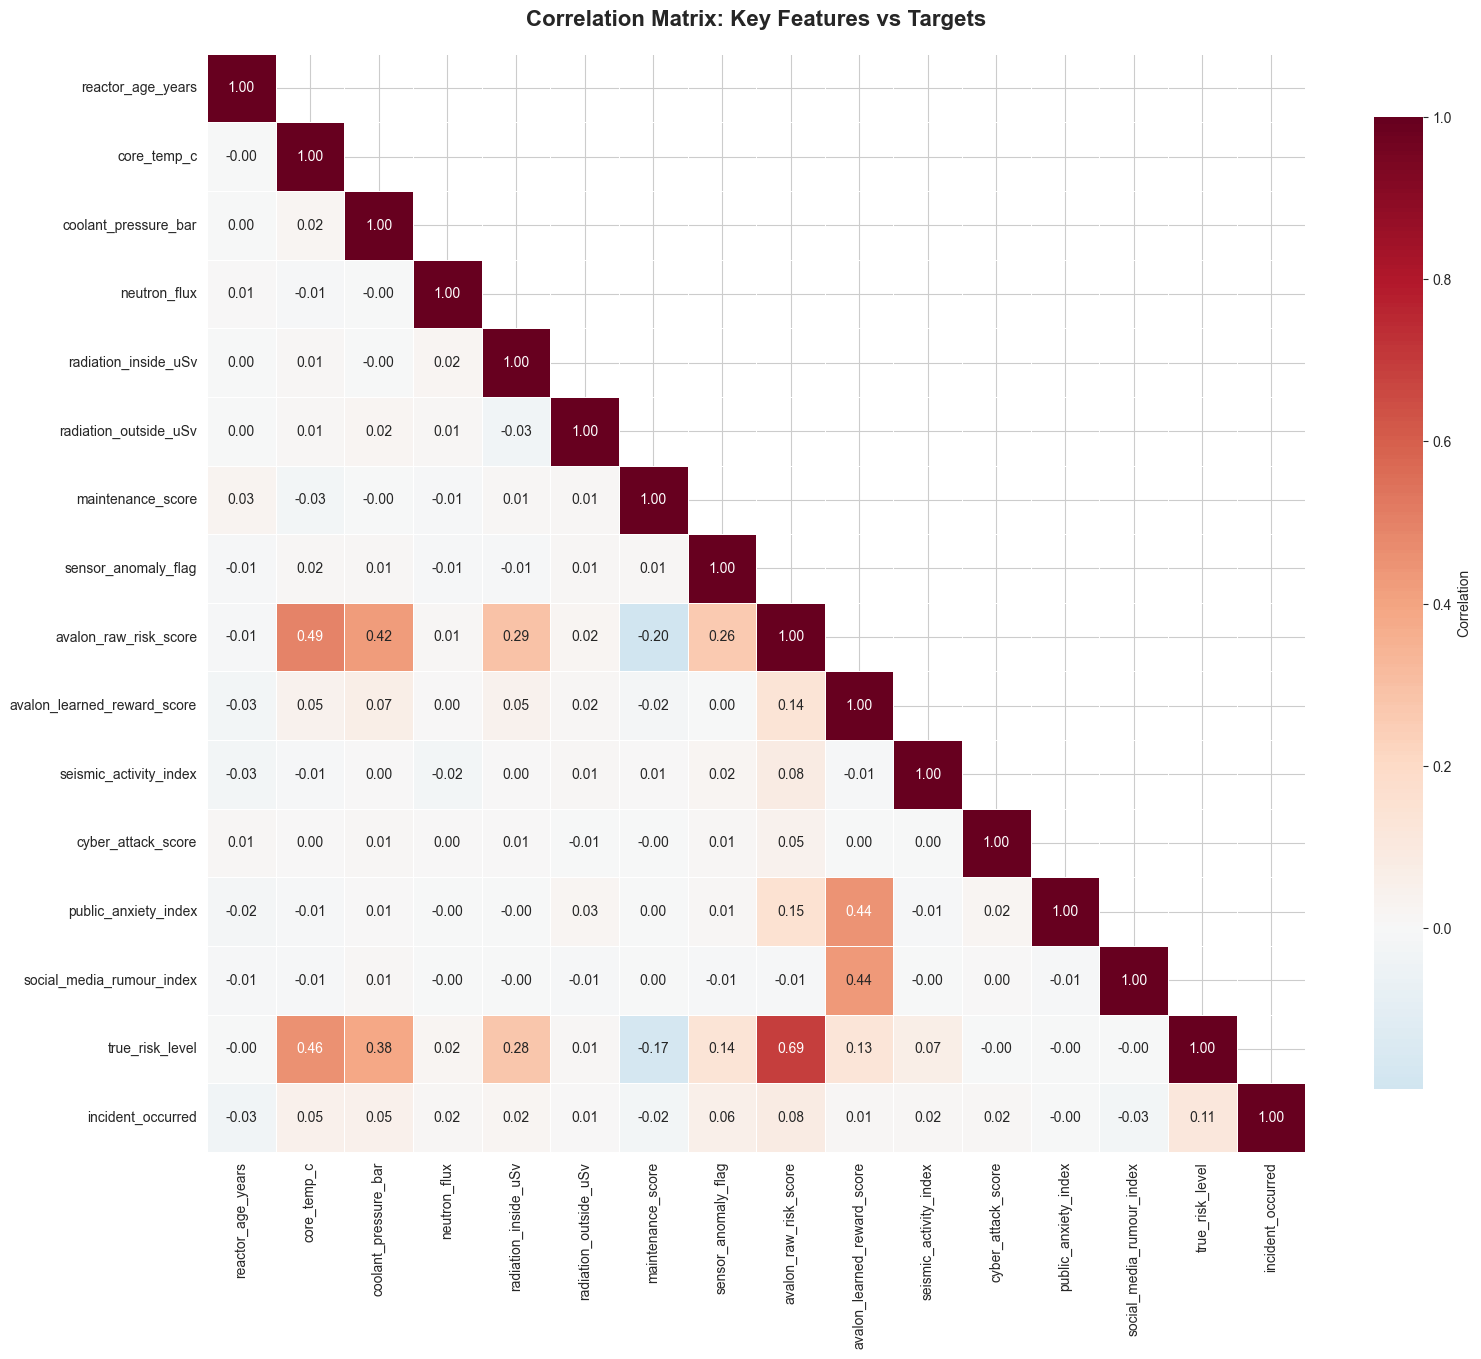

In [28]:
# EDA 7: CORRELATION MATRIX HEATMAP
# Select subset of most important features for readability
important_features = [
    'reactor_age_years', 'core_temp_c', 'coolant_pressure_bar', 'neutron_flux',
    'radiation_inside_uSv', 'radiation_outside_uSv', 'maintenance_score',
    'sensor_anomaly_flag', 'avalon_raw_risk_score', 'avalon_learned_reward_score',
    'seismic_activity_index', 'cyber_attack_score', 'public_anxiety_index',
    'social_media_rumour_index', 'true_risk_level', 'incident_occurred'
]

corr_matrix = nuclear_data[important_features].corr()

plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8, 'label': 'Correlation'})
plt.title('Correlation Matrix: Key Features vs Targets', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [29]:
# EDA 8: OUTLIER DETECTION
print("="*80)
print("OUTLIER ANALYSIS")
print("="*80)

numerical_features = nuclear_data.select_dtypes(include=[np.number]).columns.tolist()
exclude_outlier_check = ['incident_occurred', 'true_risk_level', 'year', 'avalon_evac_recommendation', 
                         'avalon_shutdown_recommendation', 'human_override', 'sensor_anomaly_flag',
                         'reactor_type_code']
features_to_check = [f for f in numerical_features if f not in exclude_outlier_check]

outlier_summary = []

for feature in features_to_check[:10]:  # Check first 10 features
    Q1 = nuclear_data[feature].quantile(0.25)
    Q3 = nuclear_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = nuclear_data[(nuclear_data[feature] < lower_bound) | (nuclear_data[feature] > upper_bound)]
    outlier_pct = len(outliers) / len(nuclear_data) * 100
    
    outlier_summary.append({
        'Feature': feature,
        'Outlier_Count': len(outliers),
        'Outlier_Percentage': outlier_pct,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier_Percentage', ascending=False)
print("\nTop 10 Features by Outlier Percentage:")
print(outlier_df.to_string(index=False))

print("\n" + "="*80)

OUTLIER ANALYSIS

Top 10 Features by Outlier Percentage:
                  Feature  Outlier_Count  Outlier_Percentage    Lower_Bound  Upper_Bound
             neutron_flux             32                0.64       0.453009 1.535956e+00
          load_factor_pct             30                0.60      58.311994 1.119267e+02
           ambient_temp_c             29                0.58     -15.037309 3.905561e+01
              core_temp_c             29                0.58     254.089294 3.356688e+02
     coolant_pressure_bar             28                0.56     128.172179 1.819847e+02
 control_rod_position_pct              8                0.16      -1.468270 8.218952e+01
        reactor_age_years              0                0.00     -23.000000 7.300000e+01
 reactor_nominal_power_mw              0                0.00     108.428886 2.091820e+03
   population_within_30km              0                0.00 -751305.875000 2.228871e+06
co2_avoided_tons_per_hour              0             

GEOGRAPHIC ANALYSIS BY COUNTRY

Top 10 Countries by Incident Rate:
                Observations  Total_Incidents  Incident_Rate  Avg_Reactor_Age  Shutdown_Rate
country                                                                                     
Slovakia                 153               29          0.190           25.588          0.725
Belgium                  173               32          0.185           22.445          0.723
Poland                   140               25          0.179           25.071          0.643
Greece                   157               28          0.178           24.369          0.732
Czech Republic           172               30          0.174           25.552          0.709
France                   172               27          0.157           25.616          0.727
Austria                  152               23          0.151           24.921          0.671
Latvia                   166               25          0.151           24.922          0.687
Rom

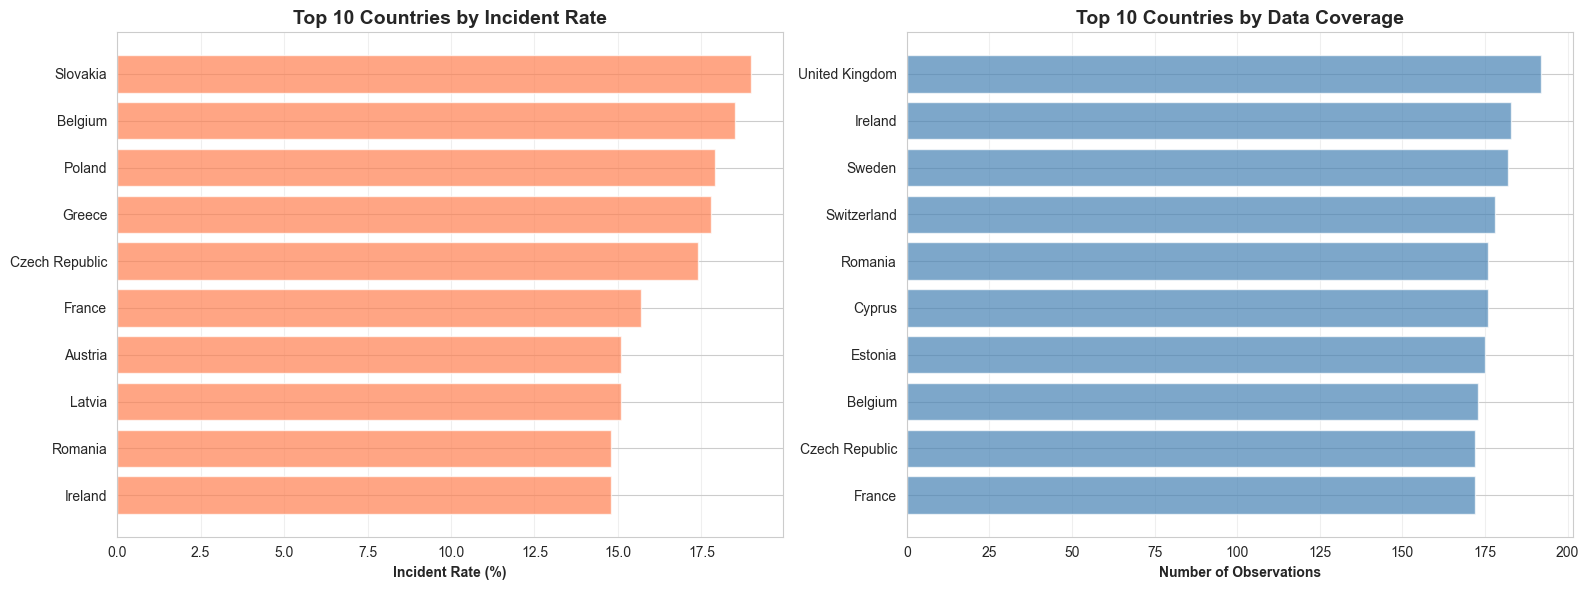

In [30]:
# EDA 9: GEOGRAPHIC ANALYSIS
print("="*80)
print("GEOGRAPHIC ANALYSIS BY COUNTRY")
print("="*80)

country_stats = nuclear_data.groupby('country').agg({
    'incident_occurred': ['count', 'sum', 'mean'],
    'reactor_age_years': 'mean',
    'avalon_shutdown_recommendation': 'mean'
}).round(3)

country_stats.columns = ['Observations', 'Total_Incidents', 'Incident_Rate', 
                         'Avg_Reactor_Age', 'Shutdown_Rate']
country_stats = country_stats.sort_values('Incident_Rate', ascending=False)

print("\nTop 10 Countries by Incident Rate:")
print(country_stats.head(10).to_string())

print("\n\nBottom 10 Countries by Incident Rate:")
print(country_stats.tail(10).to_string())

# Visualize top countries
top_countries = country_stats.head(10)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Incident rate by country
axes[0].barh(range(len(top_countries)), top_countries['Incident_Rate'] * 100, color='coral', alpha=0.7)
axes[0].set_yticks(range(len(top_countries)))
axes[0].set_yticklabels(top_countries.index)
axes[0].set_xlabel('Incident Rate (%)', fontweight='bold')
axes[0].set_title('Top 10 Countries by Incident Rate', fontweight='bold', fontsize=14)
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Number of observations by country
top_obs = nuclear_data['country'].value_counts().head(10)
axes[1].barh(range(len(top_obs)), top_obs.values, color='steelblue', alpha=0.7)
axes[1].set_yticks(range(len(top_obs)))
axes[1].set_yticklabels(top_obs.index)
axes[1].set_xlabel('Number of Observations', fontweight='bold')
axes[1].set_title('Top 10 Countries by Data Coverage', fontweight='bold', fontsize=14)
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n" + "="*80)

In [31]:
# EDA 10: KEY INSIGHTS SUMMARY
print("="*80)
print("KEY EDA INSIGHTS & FINDINGS")
print("="*80)

print("\n📊 DATASET CHARACTERISTICS:")
print(f"   • Total Observations: {len(nuclear_data):,}")
print(f"   • Time Span: {nuclear_data['year'].max() - nuclear_data['year'].min() + 1} years")
print(f"   • Geographic Coverage: {nuclear_data['country'].nunique()} countries")
print(f"   • Features: {nuclear_data.shape[1]} columns")
print(f"   • Data Quality: No missing values, {nuclear_data.duplicated().sum()} duplicates")

print("\n⚠️ INCIDENT ANALYSIS:")
print(f"   • Overall Incident Rate: {nuclear_data['incident_occurred'].mean()*100:.2f}%")
print(f"   • Total Incidents: {nuclear_data['incident_occurred'].sum()}")
print(f"   • Class Imbalance: {(nuclear_data['incident_occurred']==0).sum() / nuclear_data['incident_occurred'].sum():.1f}:1")
print(f"   • Incidents with Sensor Anomalies: {nuclear_data[nuclear_data['sensor_anomaly_flag']==1]['incident_occurred'].mean()*100:.1f}%")
print(f"   • Incidents without Sensor Anomalies: {nuclear_data[nuclear_data['sensor_anomaly_flag']==0]['incident_occurred'].mean()*100:.1f}%")

print("\n🤖 AVALON AI SYSTEM:")
print(f"   • Shutdown Recommendation Rate: {nuclear_data['avalon_shutdown_recommendation'].mean()*100:.1f}%")
print(f"   • Evacuation Recommendation Rate: {nuclear_data['avalon_evac_recommendation'].mean()*100:.1f}%")
print(f"   • Human Override Rate: {nuclear_data['human_override'].mean()*100:.2f}%")
print(f"   • AVALON Accuracy (vs incidents): ~{(1 - abs(nuclear_data['avalon_shutdown_recommendation'].mean() - nuclear_data['incident_occurred'].mean()))*100:.1f}%")

print("\n🔬 REACTOR CHARACTERISTICS:")
print(f"   • Average Reactor Age: {nuclear_data['reactor_age_years'].mean():.1f} years")
print(f"   • Oldest Reactor: {nuclear_data['reactor_age_years'].max()} years")
print(f"   • Youngest Reactor: {nuclear_data['reactor_age_years'].min()} years")
print(f"   • Reactor Types: {nuclear_data['reactor_type_code'].nunique()}")
print(f"   • Average Load Factor: {nuclear_data['load_factor_pct'].mean():.1f}%")

print("\n📈 RISK DISTRIBUTION:")
for risk_level in sorted(nuclear_data['true_risk_level'].unique()):
    count = (nuclear_data['true_risk_level'] == risk_level).sum()
    incident_rate = nuclear_data[nuclear_data['true_risk_level'] == risk_level]['incident_occurred'].mean() * 100
    print(f"   • Risk Level {risk_level}: {count} cases ({count/len(nuclear_data)*100:.1f}%), {incident_rate:.1f}% incident rate")

print("\n🌍 GEOGRAPHIC INSIGHTS:")
highest_risk_country = country_stats.index[0]
lowest_risk_country = country_stats.index[-1]
print(f"   • Highest Incident Rate: {highest_risk_country} ({country_stats.iloc[0]['Incident_Rate']*100:.1f}%)")
print(f"   • Lowest Incident Rate: {lowest_risk_country} ({country_stats.iloc[-1]['Incident_Rate']*100:.1f}%)")
print(f"   • Most Data: {nuclear_data['country'].value_counts().index[0]} ({nuclear_data['country'].value_counts().values[0]} observations)")

print("\n" + "="*80)
print("✅ EDA COMPLETE")
print("="*80)

KEY EDA INSIGHTS & FINDINGS

📊 DATASET CHARACTERISTICS:
   • Total Observations: 5,000
   • Time Span: 35 years
   • Geographic Coverage: 31 countries
   • Features: 37 columns
   • Data Quality: No missing values, 0 duplicates

⚠️ INCIDENT ANALYSIS:
   • Overall Incident Rate: 13.18%
   • Total Incidents: 659
   • Class Imbalance: 6.6:1
   • Incidents with Sensor Anomalies: 19.8%
   • Incidents without Sensor Anomalies: 12.6%

🤖 AVALON AI SYSTEM:
   • Shutdown Recommendation Rate: 70.1%
   • Evacuation Recommendation Rate: 15.3%
   • Human Override Rate: 0.10%
   • AVALON Accuracy (vs incidents): ~43.1%

🔬 REACTOR CHARACTERISTICS:
   • Average Reactor Age: 25.1 years
   • Oldest Reactor: 49 years
   • Youngest Reactor: 1 years
   • Reactor Types: 4
   • Average Load Factor: 84.8%

📈 RISK DISTRIBUTION:
   • Risk Level 0: 134 cases (2.7%), 0.0% incident rate
   • Risk Level 1: 422 cases (8.4%), 6.2% incident rate
   • Risk Level 2: 990 cases (19.8%), 9.9% incident rate
   • Risk Level 3

Confusion Matrix (rows = actual, cols = AVALON recommendation):

                     Pred: No Shutdown  Pred: Shutdown
Actual: No Incident               1376            2965
Actual: Incident                   118             541

Overall accuracy of AVALON shutdown recommendation: 0.38



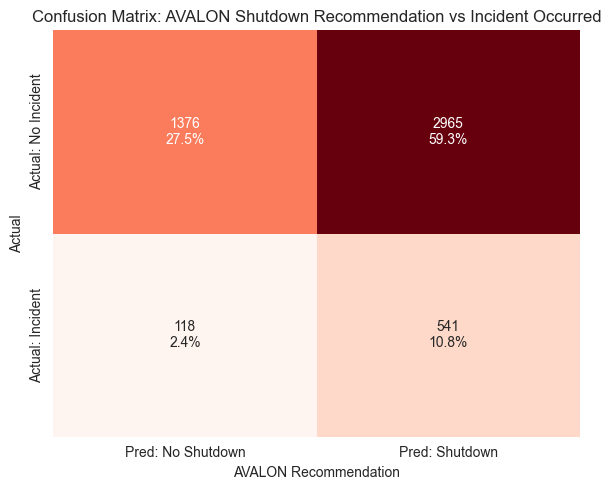

In [38]:
# Confusion matrix: AVALON shutdown recommendation vs actual incident occurrence
y_true = nuclear_data['incident_occurred']
y_pred = nuclear_data['avalon_shutdown_recommendation']

cm = confusion_matrix(y_true, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual: No Incident', 'Actual: Incident'],
                     columns=['Pred: No Shutdown', 'Pred: Shutdown'])

# Annotate with counts and overall percentage
total = cm.sum()
pct = cm / total
annot = np.empty_like(cm).astype(object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f"{cm[i, j]}\n{pct[i, j]*100:.1f}%"

print("Confusion Matrix (rows = actual, cols = AVALON recommendation):\n")
print(cm_df)
print(f"\nOverall accuracy of AVALON shutdown recommendation: { (cm.trace()/total):.2f}\n")

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=annot, fmt='', cmap='Reds', cbar=False,
            xticklabels=cm_df.columns, yticklabels=cm_df.index)
plt.title('Confusion Matrix: AVALON Shutdown Recommendation vs Incident Occurred')
plt.ylabel('Actual')
plt.xlabel('AVALON Recommendation')
plt.tight_layout()
plt.show()

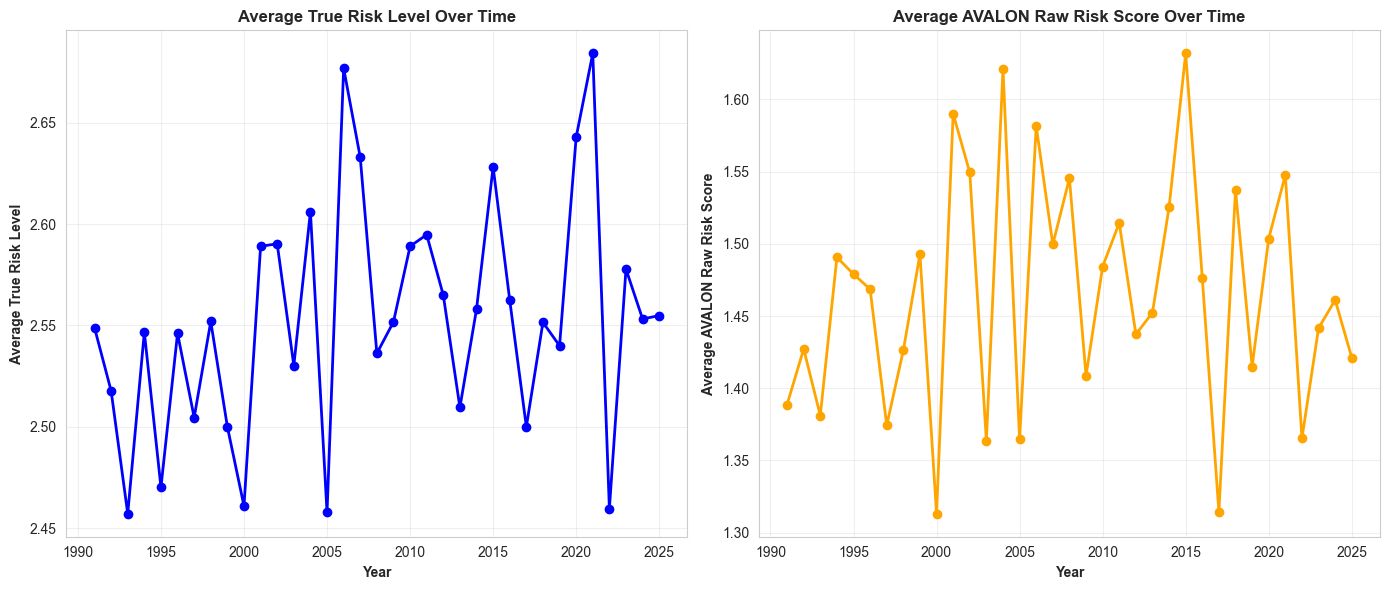

In [39]:
# show avalon's risk level vs actual risk level year over year
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Average true risk level by year
true_risk_by_year = nuclear_data.groupby('year')['true_risk_level'].mean()
axes[0].plot(true_risk_by_year.index, true_risk_by_year.values, marker='o', linewidth=2, color='blue')
axes[0].set_xlabel('Year', fontweight='bold')
axes[0].set_ylabel('Average True Risk Level', fontweight='bold')
axes[0].set_title('Average True Risk Level Over Time', fontweight='bold')
axes[0].grid(True, alpha=0.3)
# Average AVALON risk score by year
avalon_risk_by_year = nuclear_data.groupby('year')['avalon_raw_risk_score'].mean()
axes[1].plot(avalon_risk_by_year.index, avalon_risk_by_year.values, marker='o', linewidth=2, color='orange')
axes[1].set_xlabel('Year', fontweight='bold')
axes[1].set_ylabel('Average AVALON Raw Risk Score', fontweight='bold')
axes[1].set_title('Average AVALON Raw Risk Score Over Time', fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()            

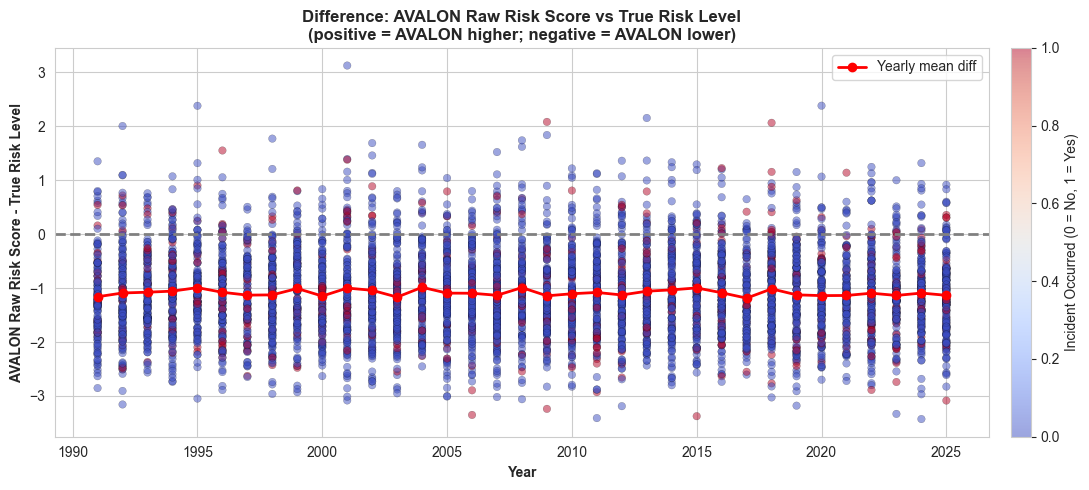

In [42]:
# Compute difference between AVALON raw risk score and the true risk level
nuclear_data['avalon_vs_true_diff'] = nuclear_data['avalon_raw_risk_score'] - nuclear_data['true_risk_level']

# Plot difference by year (points) with yearly mean trend line
fig, ax = plt.subplots(figsize=(12, 5))

# Scatter: individual samples (colored by incident occurrence)
sc = ax.scatter(
    nuclear_data['year'],
    nuclear_data['avalon_vs_true_diff'],
    c=nuclear_data['incident_occurred'],
    cmap='coolwarm',
    alpha=0.5,
    s=30,
    edgecolors='k',
    linewidth=0.2
)

# Yearly mean difference
year_mean = nuclear_data.groupby('year')['avalon_vs_true_diff'].mean()
ax.plot(year_mean.index, year_mean.values, color='red', marker='o', linewidth=2, label='Yearly mean diff')

# Reference line at zero (AVALON == True)
ax.axhline(0, color='gray', linestyle='--', linewidth=2)

ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('AVALON Raw Risk Score - True Risk Level', fontweight='bold')
ax.set_title('Difference: AVALON Raw Risk Score vs True Risk Level\n(positive = AVALON higher; negative = AVALON lower)', fontweight='bold')
ax.legend(loc='upper right')

# Add colorbar for incident occurrence
cbar = plt.colorbar(sc, ax=ax, pad=0.02)
cbar.set_label('Incident Occurred (0 = No, 1 = Yes)')

plt.tight_layout()
plt.show()